# Data Wrangling and EDA - Prodigy Education review classifier
## Contents
    1.Introduction
    2. Imports
    3. Data Exploration
        3.1 Checking data types
        3.2 Exploratory Data Analysis
            3.2.1 Types of issues
            3.2.2 Versions reviewed
            3.2.3 Reviews with most agreement
            3.2.4 Response from developer by type of issue
            3.2.5 Distribution of issues over time
    4. Preprocessing
        4.1 Function to clean text
        4.2 Converting into clean text
        4.3 Function to Lemmatize text
        4.4 Applying Lemmatization
        4.5 Removing Unnecessary data
        4.6 Export data as CSV
    5. Summary

## 1.Introduction

In this notebook, the one star reviews that were scraped from Prodigy education's Google play store reviews are being wrangled and data exploration is performed. 

## 2. Imports

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import re
import pickle
from nltk.stem import WordNetLemmatizer  #to lematize words

In [2]:
#Import the data
one_star_reviews=pd.read_csv("one_star_updated.csv")

## 3. Data Exploration
## 3.1 Checking data types

In [3]:
#Review how it looks in pandas
one_star_reviews.head()

,Unnamed: 0,reviewId,userName,userImage,content,reason,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOHGo5DvHMAsWL348tPB0UyWXab1Cf8r4JFAvkQ...,Lucas Nauerz 2,https://play-lh.googleusercontent.com/a/AATXAJ...,Terrible,No specific reason,1,0,4.0.1,2021-07-12 23:46:34,NaN,NaN
1,1,gp:AOqpTOEmolYJbr7nOSKFkD6D0aOS2XCwgfX_vXdbOlx...,Liam Wrona,https://play-lh.googleusercontent.com/a/AATXAJ...,This is a horrible app! You have to have a mem...,Gameplay,1,11,4.0.1,2021-07-12 16:54:28,NaN,NaN
2,2,gp:AOqpTOEHBo9TDJOlSMQEC4qz1w0aKgb4L0gGfdGKxbS...,Alpha Wolf,https://play-lh.googleusercontent.com/a-/AOh14...,This game is hella pay to win. Everything revo...,Gameplay,1,9,4.0.1,2021-07-11 23:20:59,NaN,NaN
3,3,gp:AOqpTOFK5o4TR7Wmst5jhrpg5zaqOAnpedisM27MqH_...,Ana Caballero,https://play-lh.googleusercontent.com/a/AATXAJ...,HORIBLE this gam is bad on phones and wont let...,Technical,1,0,NaN,2021-07-10 00:34:59,NaN,NaN
4,4,gp:AOqpTOE50ai2RKBeeLzmIOkn7RMBOD1xOtgzBzi341g...,RR ASHRINDRA,https://play-lh.googleusercontent.com/a-/AOh14...,It USED to be a good game until they added mem...,Membership,1,13,NaN,2021-07-09 21:49:48,NaN,NaN


In [4]:
#Check datatypes
one_star_reviews.dtypes

Unnamed: 0               int64
reviewId                object
userName                object
userImage               object
content                 object
reason                  object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [5]:
one_star_reviews.columns

Index(['Unnamed: 0', 'reviewId', 'userName', 'userImage', 'content', 'reason',
       'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [6]:
#Drop duplicate index, review ID, username and user Image
one_star_reviews.drop(['Unnamed: 0', 'reviewId', 'userName', 'userImage'],axis=1,inplace=True)

In [7]:
one_star_reviews.head()

,content,reason,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Terrible,No specific reason,1,0,4.0.1,2021-07-12 23:46:34,NaN,NaN
1,This is a horrible app! You have to have a mem...,Gameplay,1,11,4.0.1,2021-07-12 16:54:28,NaN,NaN
2,This game is hella pay to win. Everything revo...,Gameplay,1,9,4.0.1,2021-07-11 23:20:59,NaN,NaN
3,HORIBLE this gam is bad on phones and wont let...,Technical,1,0,NaN,2021-07-10 00:34:59,NaN,NaN
4,It USED to be a good game until they added mem...,Membership,1,13,NaN,2021-07-09 21:49:48,NaN,NaN


In [8]:
#Only reviews from last 1 year are tagged with the reason. So, create a dtaframe with just that data
required_data=one_star_reviews.dropna(subset=["reason"])

In [9]:
#Check null values of other columns
print(required_data.isna().sum())
print(required_data.shape)

content                   0
reason                    0
score                     0
thumbsUpCount             0
reviewCreatedVersion    207
at                        0
replyContent            421
repliedAt               421
dtype: int64
(510, 8)


## 3.2 Exploratory Data Analysis
## 3.2.1 Types of issues

Text(0.5, 1.0, 'Count of number of issues reported by customer by issue type')

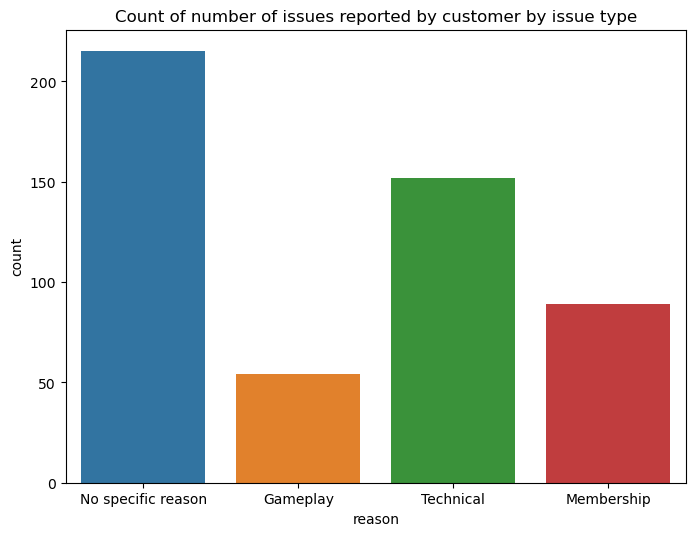

In [10]:
#Check total count by issue 
figure(figsize=(8, 6),dpi=100)
sns.countplot(x='reason', data=required_data)
plt.title("Count of number of issues reported by customer by issue type")
#required_data["reason"].value_counts()

## A lot of people leave 1 star reviews but do not give a valid reasoning. This is followed by Technical issues, Membership requirements and the Gameplay has the lowest count of issues.

## 3.2.2 Versions reviewed

Text(0.5, 1.0, 'Count of version reviewed')

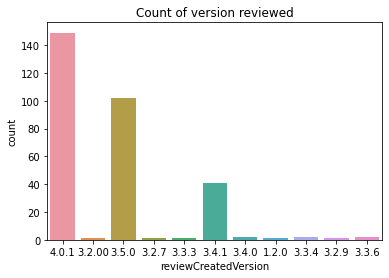

In [11]:
#plot of the version being reviewed
figure(figsize=(6, 4))
sns.countplot(x='reviewCreatedVersion', data=required_data)
plt.title("Count of version reviewed")
#required_data.reviewCreatedVersion.value_counts()

## It is important to note that the review version column has about 200 mising values. So, this could be older versions. But it is considered as relevant for now.

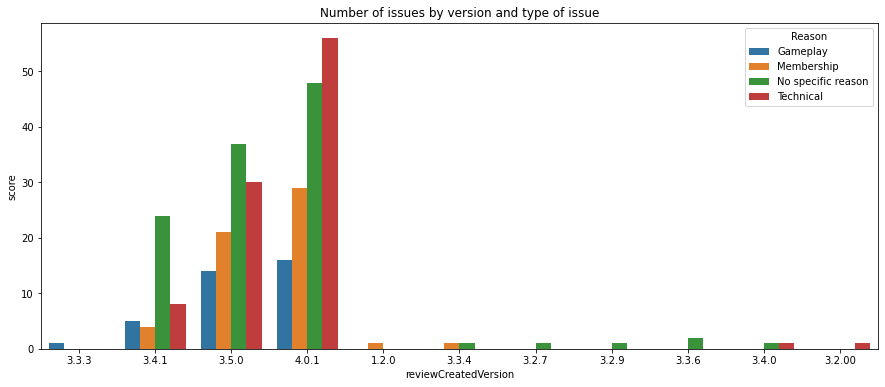

In [12]:
split_by_reason_version=pd.DataFrame(required_data.groupby(["reason","reviewCreatedVersion"])["score"].sum())
split_by_reason_version.reset_index(inplace=True)
figure(figsize=(15, 6))
sns.barplot(data=split_by_reason_version,hue="reason",y="score",x="reviewCreatedVersion")
plt.title("Number of issues by version and type of issue")
plt.legend(loc='upper right',title="Reason")
plt.show()

### The number of technical issues in version 4.0.1 is higher than the number of other issues. But the quantity is not significantly different.

## 3.2.3 Reviews with most agreement

In [13]:
#Checking top 10 reviews with most thumbs up Count:
required_data.sort_values(by=["thumbsUpCount"],ascending=False)[:10]

,content,reason,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
321,"I love prodigy I use to play it more often, bu...",Membership,1,201,3.5.0,2020-10-23 09:03:07,NaN,NaN
278,I really like this game. Everything is appeali...,Membership,1,173,3.5.0,2020-11-18 14:01:48,NaN,NaN
353,The PC experience is great. Fun math game with...,Gameplay,1,145,3.5.0,2020-10-03 05:23:02,"Hi there, we're sorry you're experiencing a pr...",2020-10-07 09:59:21
34,"I mean, this used to be an awesome game, espec...",Membership,1,141,4.0.1,2021-06-10 19:57:09,NaN,NaN
343,I hate this. Everything is for members. You ex...,Membership,1,119,3.5.0,2020-10-11 10:56:53,NaN,NaN
227,"I hate this game, I keep getting kicked out ag...",Membership,1,110,4.0.1,2021-01-01 14:35:39,NaN,NaN
130,THE MEMBERSHIP SUCKS!! AND CHANGE THE PETS BAC...,Membership,1,78,4.0.1,2021-03-18 18:14:28,NaN,NaN
169,I was on board until I went to evolve my pet a...,Membership,1,63,4.0.1,2021-02-23 21:27:12,NaN,NaN
175,"I used to love this game, but now. There r pro...",Technical,1,49,4.0.1,2021-02-14 18:27:29,NaN,NaN
489,Prodigy would not even let me type in an answe...,Technical,1,49,3.4.1,2020-06-23 14:03:33,NaN,NaN


### 7 out of top 10 Issues are because of the membership requirements. 2 of the top 10 issues is for Technical and 1 for Gameplay. Even though there are more individual instances of technical issues, a huge portion of the customers agree that membership issues are of high importance

## 3.2.4 Response from developer by type of issue

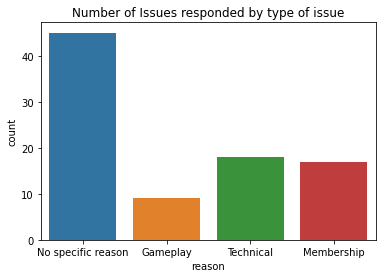

In [14]:
#Check number of issues replied to
sns.countplot(x='reason', data=required_data.loc[required_data["replyContent"].notnull()])
plt.title("Number of Issues responded by type of issue")
plt.show()

### Less than 100 issues had responses from the developer. The number of responses are distributed in a similar fashion as the number of issues.

## 3.2.5 Distribution of issues over time

In [15]:
#Distribution of issues over time:
required_data._is_copy= False # to avoid SettingWithCopyWarning warning https://stackoverflow.com/questions/40033471/getting-settingwithcopywarning-warning-even-after-using-loc-in-pandas
required_data.loc[:,"at"]=pd.to_datetime(required_data["at"]).dt.date #remove hours,minutes,seconds & convert datatype
required_data.loc[:,"at"]=pd.to_datetime(required_data["at"]) # convert to datetime object
required_data["time_period"]=pd.to_datetime(required_data['at'],format='%m%Y', errors='coerce').dt.to_period('m')
required_data.dtypes

content                         object
reason                          object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt                       object
time_period                  period[M]
dtype: object

In [16]:
required_data

,content,reason,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,time_period
0,Terrible,No specific reason,1,0,4.0.1,2021-07-12,NaN,NaN,2021-07
1,This is a horrible app! You have to have a mem...,Gameplay,1,11,4.0.1,2021-07-12,NaN,NaN,2021-07
2,This game is hella pay to win. Everything revo...,Gameplay,1,9,4.0.1,2021-07-11,NaN,NaN,2021-07
3,HORIBLE this gam is bad on phones and wont let...,Technical,1,0,NaN,2021-07-10,NaN,NaN,2021-07
4,It USED to be a good game until they added mem...,Membership,1,13,NaN,2021-07-09,NaN,NaN,2021-07
...,...,...,...,...,...,...,...,...,...
505,another math game >:(,No specific reason,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06
506,It not so fun I hate wizards the controls is n...,Gameplay,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06
507,They changed it so much it was better before.,No specific reason,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06
508,NOOOOOOOOOO!!!!!!!!!!!!!!!!! NOT TODAY NOT TOM...,No specific reason,1,0,NaN,2020-06-11,NaN,NaN,2020-06


In [17]:
by_month=pd.DataFrame(required_data.value_counts(subset=["reason","time_period"]))
by_month.columns=["counts"] #change column name
by_month.reset_index(inplace=True) # reset the index
by_month.set_index(["time_period"],inplace=True) # set the date time as index
by_month["review_month"]=by_month.index.to_timestamp()

In [18]:
by_month=by_month.sort_index()
by_month.head()

,reason,counts,review_month
time_period,,,
2020-06,Membership,1,2020-06-01
2020-06,Gameplay,3,2020-06-01
2020-06,No specific reason,19,2020-06-01
2020-06,Technical,8,2020-06-01
2020-07,Gameplay,4,2020-07-01


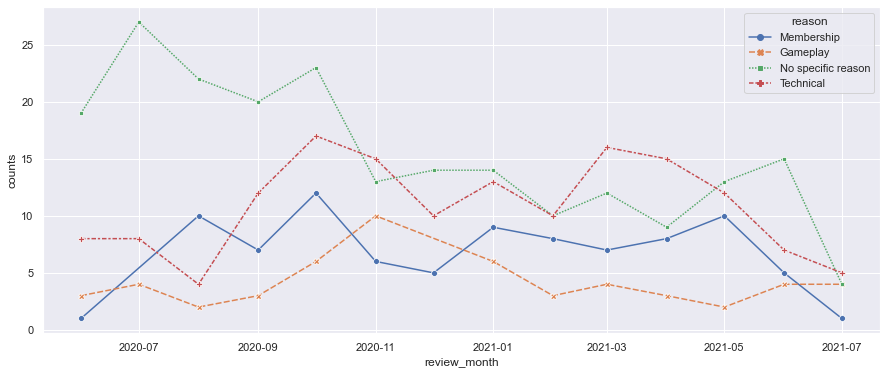

In [32]:
fig, ax = plt.subplots(figsize=(15,6))
#sns.set()
sns.lineplot(data=by_month,x="review_month",y="counts",style="reason",hue="reason",markers=True)
#sns.barplot(data=by_month,x="review_month",y="counts",hue="reason")
#plt.xticks(rotation=90)
#x_dates = by_month['review_month'].dt.strftime('%m-%Y').unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()

### No specific trend seen here. The number of issues is lower in July 2021 as we only have data for first 12 days.

## 4. Preprocessing

### Since the text was extracted from google play store, it has to be cleaned.Only the review content is nalysed here. The replies from customer service is ignored.

In [20]:
required_data

,content,reason,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,time_period
0,Terrible,No specific reason,1,0,4.0.1,2021-07-12,NaN,NaN,2021-07
1,This is a horrible app! You have to have a mem...,Gameplay,1,11,4.0.1,2021-07-12,NaN,NaN,2021-07
2,This game is hella pay to win. Everything revo...,Gameplay,1,9,4.0.1,2021-07-11,NaN,NaN,2021-07
3,HORIBLE this gam is bad on phones and wont let...,Technical,1,0,NaN,2021-07-10,NaN,NaN,2021-07
4,It USED to be a good game until they added mem...,Membership,1,13,NaN,2021-07-09,NaN,NaN,2021-07
...,...,...,...,...,...,...,...,...,...
505,another math game >:(,No specific reason,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06
506,It not so fun I hate wizards the controls is n...,Gameplay,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06
507,They changed it so much it was better before.,No specific reason,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06
508,NOOOOOOOOOO!!!!!!!!!!!!!!!!! NOT TODAY NOT TOM...,No specific reason,1,0,NaN,2020-06-11,NaN,NaN,2020-06


In [21]:
#taking sample data to see how text is present and what needs to be removed
text=required_data["content"][505]
print(text)

another math game >:(


## 4.1 Function to clean text

In [22]:
#function to remove characters other than alphabets
def get_clean_text(sentence):
    cleaned="".join(re.sub(r'[^a-zA-Z ]+', '', word.lower()) for word in sentence)
    #for word in sentence:
    return cleaned.rstrip().lstrip()

In [23]:
get_clean_text(text)

'another math game'

## 4.2 Converting into clean text

In [24]:
required_data["formatted_content"]=required_data["content"].apply(get_clean_text)

## 4.3 Function to Lemmatize text

In [25]:
#Function that lemmatizes words to reduce thge number of different variations of a feature
def lemmatization(sentence):
    lemmatized_sentance=" ".join(WordNetLemmatizer().lemmatize(word) for word in sentence.split())
    return lemmatized_sentance

In [26]:
lemmatization('dogs cats')

'dog cat'

## 4.4 Applying Lemmatization

In [27]:
required_data["lemmatized_content"]=required_data["formatted_content"].apply(lemmatization)

In [28]:
required_data

,content,reason,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,time_period,formatted_content,lemmatized_content
0,Terrible,No specific reason,1,0,4.0.1,2021-07-12,NaN,NaN,2021-07,terrible,terrible
1,This is a horrible app! You have to have a mem...,Gameplay,1,11,4.0.1,2021-07-12,NaN,NaN,2021-07,this is a horrible app you have to have a memb...,this is a horrible app you have to have a memb...
2,This game is hella pay to win. Everything revo...,Gameplay,1,9,4.0.1,2021-07-11,NaN,NaN,2021-07,this game is hella pay to win everything revol...,this game is hella pay to win everything revol...
3,HORIBLE this gam is bad on phones and wont let...,Technical,1,0,NaN,2021-07-10,NaN,NaN,2021-07,horible this gam is bad on phones and wont let...,horible this gam is bad on phone and wont let ...
4,It USED to be a good game until they added mem...,Membership,1,13,NaN,2021-07-09,NaN,NaN,2021-07,it used to be a good game until they added mem...,it used to be a good game until they added mem...
...,...,...,...,...,...,...,...,...,...,...,...
505,another math game >:(,No specific reason,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06,another math game,another math game
506,It not so fun I hate wizards the controls is n...,Gameplay,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06,it not so fun i hate wizards the controls is n...,it not so fun i hate wizard the control is not...
507,They changed it so much it was better before.,No specific reason,1,0,3.4.1,2020-06-12,NaN,NaN,2020-06,they changed it so much it was better before,they changed it so much it wa better before
508,NOOOOOOOOOO!!!!!!!!!!!!!!!!! NOT TODAY NOT TOM...,No specific reason,1,0,NaN,2020-06-11,NaN,NaN,2020-06,noooooooooo not today not tomrow not ever,noooooooooo not today not tomrow not ever


## 4.5 Removing Unnecessary data

In [29]:
preprocessed_dataframe=required_data.drop(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'at', 'replyContent', 'repliedAt','formatted_content' ,'time_period'],axis=1)

In [30]:
preprocessed_dataframe

,reason,lemmatized_content
0,No specific reason,terrible
1,Gameplay,this is a horrible app you have to have a memb...
2,Gameplay,this game is hella pay to win everything revol...
3,Technical,horible this gam is bad on phone and wont let ...
4,Membership,it used to be a good game until they added mem...
...,...,...
505,No specific reason,another math game
506,Gameplay,it not so fun i hate wizard the control is not...
507,No specific reason,they changed it so much it wa better before
508,No specific reason,noooooooooo not today not tomrow not ever


## 4.6 Export data as CSV

In [31]:
preprocessed_dataframe.to_csv("preprocessed_dataframe.csv",index=False)

## 5. Summary

We have gained some good insights from this notebook. THere are a lot of times when the customer does not mention why they give a low rating. Ignoring that, the major reasons are membership related or technical. There are some gameplay issues too but there are not a lot of those.  

The response rate is less than 20% from the developer and this could lead to customer feeling that their reviews are not valued. In the next notebook, we can look at a way to buiild a model to automatically classify issues and how it can be used to improve cutomer experience.